In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from matplotlib.dates import DateFormatter


In [194]:
df_validation = pd.read_csv(r'../../data/tidy/energy_validation_april2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [195]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [196]:
len(df_model['Vehicle'].unique())

178

In [197]:
len(df_validation['date'].unique())

30

In [198]:
len(df_model['Date'].unique())

30

In [199]:
df_model.columns

Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'ServiceDateTime', 'Unnamed: 0', 'DateKey',
       'CalendarDate', 'Year', 'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2',
       'Route', 'RouteName', 'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName',
       'Lat', 'Lon', 'Vehicle', 'VehicleType', 'SeatedCap', 'TotalCap',
       'Boards', 'Alights', 'Onboard', 'Bike', 'Wheelchair', 'Weekday', 'Hour',
       'Minute', 'Second', 'Date', 'Daytype', 'time', 'time_delta',
       'time_delta_in_seconds', 'dist', 'speed', 'acc', 'Powertrain',
       'VehicleModel', 'Vehicle_mass', 'elevation', 'grade', 'Power(KW)',
       'FuelRate(L/s)', 'Energy', 'FuelRate/Energy'],
      dtype='object')

In [200]:
df_model.VehicleModel.unique()

array(['0', 'New Flyer 35 electric', 'Proterra 40 electric',
       'New Flyer 40 electric', 'Gillig 35 conventional',
       'Gillig 40 conventional', 'New Flyer 35 conventional',
       'New Flyer 40 conventional (HYBRID)', 'New Flyer 40 conventional',
       'New Flyer 60 hybrid'], dtype=object)

In [201]:
df_model['VehicleModel'].replace('0', 'Unknown', inplace=True)
df_model['VehicleModel'].replace('New Flyer 35 electric', 'New Flyer 35', inplace=True)
df_model['VehicleModel'].replace('Proterra 40 electric', 'Proterra 40', inplace=True)
df_model['VehicleModel'].replace('New Flyer 40 electric', 'New Flyer 40', inplace=True)
df_model['VehicleModel'].replace('Gillig 35 conventional', 'Gillig 35', inplace=True)
df_model['VehicleModel'].replace('Gillig 40 conventional', 'Gillig 40', inplace=True)
df_model['VehicleModel'].replace('New Flyer 35 conventional', 'New Flyer 35', inplace=True)
df_model['VehicleModel'].replace('New Flyer 40 conventional (HYBRID)', 'New Flyer 40', inplace=True)
df_model['VehicleModel'].replace('New Flyer 40 conventional', 'New Flyer 40', inplace=True)
df_model['VehicleModel'].replace('New Flyer 60 hybrid', 'New Flyer 60', inplace=True)

In [202]:
df_model.VehicleModel.unique()

array(['Unknown', 'New Flyer 35', 'Proterra 40', 'New Flyer 40',
       'Gillig 35', 'Gillig 40', 'New Flyer 60'], dtype=object)

In [203]:
validation_vehicles=df_validation['equipment_id'].unique()

In [204]:
len(validation_vehicles)

174

In [205]:
df_model_filtered=df_model.loc[df_model.Vehicle.isin(validation_vehicles)]

In [206]:
df_model['Date']=pd.to_datetime(df_model['Date'])

In [207]:
df_model_filtered

Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  \
2391             2391          2391          2391          2391          2391   
2392             2392          2392          2392          2392          2392   
2393             2393          2393          2393          2393          2393   
2394             2394          2394          2394          2394          2394   
2395             2395          2395          2395          2395          2395   
...               ...           ...           ...           ...           ...   
1361544       1361544       1361544       1361544       1361544       1361544   
1361545       1361545       1361545       1361545       1361545       1361545   
1361546       1361546       1361546       1361546       1361546       1361546   
1361547       1361547       1361547       1361547       1361547       1361547   
1361548       1361548       1361548       1361548       1361548       1361548   

             ServiceDateTime  Unnamed: 0  DateKey             CalendarDate  \
2391     2022-04-29 14:01:44     1273034     8788  2022-04-29 00:00:00.000   
2392     2022-04-29 14:28:20     1273037     8788  2022-04-29 00:00:00.000   
2393     2022-04-29 14:28:20     1273500     8788  2022-04-29 00:00:00.000   
2394     2022-04-29 14:30:55     1273501     8788  2022-04-29 00:00:00.000   
2395     2022-04-29 14:31:09     1273502     8788  2022-04-29 00:00:00.000   
...                      ...         ...      ...                      ...   
1361544  2022-04-30 23:54:20     1325566     8789  2022-04-30 00:00:00.000   
1361545  2022-04-30 23:55:24     1325567     8789  2022-04-30 00:00:00.000   
1361546  2022-04-30 23:56:47     1325568     8789  2022-04-30 00:00:00.000   
1361547  2022-04-30 23:57:32     1325569     8789  2022-04-30 00:00:00.000   
1361548  2022-04-30 23:59:29     1325570     8789  2022-04-30 00:00:00.000   

         Year  ...       acc    Powertrain  VehicleModel  Vehicle_mass  \
2391     2022  ...  0.000000      electric  New Flyer 35       26900.0   
2392     2022  ...  0.005579      electric  New Flyer 35       26900.0   
2393     2022  ...  0.000000      electric  New Flyer 35       26900.0   
2394     2022  ...  0.035274      electric  New Flyer 35       26900.0   
2395     2022  ...  0.678410      electric  New Flyer 35       26900.0   
...       ...  ...       ...           ...           ...           ...   
1361544  2022  ...  0.003673  conventional       Unknown       26900.0   
1361545  2022  ...  0.015960  conventional       Unknown       26900.0   
1361546  2022  ... -0.013643  conventional       Unknown       26900.0   
1361547  2022  ...  0.057755  conventional       Unknown       26900.0   
1361548  2022  ...  0.045523  conventional       Unknown       26900.0   

         elevation     grade   Power(KW)  FuelRate(L/s)     Energy  \
2391          64.0  0.000000    0.000000       0.000000   0.000000   
2392         134.0  0.004924   31.026486       0.000000  13.755075   
2393         134.0  0.000000    0.000000       0.000000   0.000000   
2394         135.0  0.001180   18.110636       0.000000   0.779764   
2395         129.0 -0.028638  256.862857       0.000000   0.998911   
...            ...       ...         ...            ...        ...   
1361544       53.0 -0.051392  -17.216605       0.001858   0.068716   
1361545       54.0  0.003961    6.338875       0.002409   0.040723   
1361546       54.0  0.000000    1.641251       0.002000   0.043863   
1361547       53.0 -0.004106    6.706874       0.002441   0.029013   
1361548       52.0 -0.000796   16.884959       0.003326   0.102815   

         FuelRate/Energy  
2391                 NaN  
2392                 NaN  
2393                 NaN  
2394                 NaN  
2395                 NaN  
...                  ...  
1361544              NaN  
1361545              NaN  
1361546              NaN  
1361547              NaN  
1361548              NaN  

[1329793 rows x 54 columns]

In [208]:
df_model_filtered = df_model_filtered.groupby(['Vehicle', 'Date']).agg({'Energy': ['sum'] ,'Powertrain': ['max'], 'dist': ['sum'], 'VehicleModel':['max']}).reset_index()

In [209]:
df_model_filtered

Vehicle        Date     Energy    Powertrain        dist  VehicleModel
                                sum           max         sum           max
0       1320  2022-04-29  64.494289      electric   38.462541  New Flyer 35
1       1321  2022-04-01  15.706418      electric    9.615819  New Flyer 35
2       1321  2022-04-04  28.960943      electric   11.612397  New Flyer 35
3       1321  2022-04-05  52.237175      electric   25.229515  New Flyer 35
4       1321  2022-04-06   9.934224      electric    7.551147  New Flyer 35
...      ...         ...        ...           ...         ...           ...
3005    7902  2022-04-26  13.425808  conventional   52.211481       Unknown
3006    7902  2022-04-27  21.742305  conventional   86.274257       Unknown
3007    7902  2022-04-28  47.762028  conventional   70.515202       Unknown
3008    7902  2022-04-29  49.267453  conventional   87.448258       Unknown
3009    7902  2022-04-30  53.575616  conventional  156.909658       Unknown

[3010 rows x 6 columns]

In [210]:
df_model_filtered['Energy']

sum
0     64.494289
1     15.706418
2     28.960943
3     52.237175
4      9.934224
...         ...
3005  13.425808
3006  21.742305
3007  47.762028
3008  49.267453
3009  53.575616

[3010 rows x 1 columns]

In [211]:
model_vehicles=df_model['Vehicle'].unique()

In [212]:
df_validation_filtered=df_validation.loc[df_validation.equipment_id.isin(model_vehicles)]

In [213]:
len(df_validation_filtered.equipment_id.unique())

171

In [214]:
df_validation_filtered

Unnamed: 0            timestamp  equipment_id  gallons        date  \
0          58949  2022-04-01 18:59:00          3212     10.1  2022-04-01   
1          59065  2022-04-07 01:01:00          3212     29.3  2022-04-07   
2          59092  2022-04-08 05:33:00          3212     52.0  2022-04-08   
3          59100  2022-04-08 23:20:00          3212     25.1  2022-04-08   
4          59125  2022-04-10 05:38:00          3212     54.1  2022-04-10   
...          ...                  ...           ...      ...         ...   
2948        4682  2022-04-26 19:12:00          7816     51.6  2022-04-26   
2949        4683  2022-04-27 20:39:00          7816     19.3  2022-04-27   
2950        4684  2022-04-28 14:02:00          7816     14.0  2022-04-28   
2951        4685  2022-04-29 19:10:00          7816     18.4  2022-04-29   
2952        4686  2022-04-30 13:02:00          7816     19.9  2022-04-30   

        Powertrain  
0     conventional  
1     conventional  
2     conventional  
3     conventional  
4     conventional  
...            ...  
2948  conventional  
2949  conventional  
2950  conventional  
2951  conventional  
2952  conventional  

[2938 rows x 6 columns]

In [215]:
#df_validation_filtered=df_validation_filtered[df_validation_filtered['gallons']<70]

In [216]:
df_validation_filtered['gallons'].mean()

29.053083730428856

In [217]:
df_validation_filtered['gallons'].median()

30.0

In [218]:
df_validation_filtered['gallons'].max()

84.79

In [219]:
df_validation_filtered = df_validation_filtered.groupby(['equipment_id', 'date']).agg({'gallons': ['sum']}).reset_index()

In [220]:
df_validation_filtered

equipment_id        date gallons
                                  sum
0            1320  2022-04-27    0.68
1            1320  2022-04-29    0.69
2            1321  2022-04-18    1.83
3            1321  2022-04-19    0.58
4            1321  2022-04-29    0.66
...           ...         ...     ...
2719         7902  2022-04-25   59.70
2720         7902  2022-04-26   12.20
2721         7902  2022-04-27   23.80
2722         7902  2022-04-29   19.00
2723         7902  2022-04-30   26.10

[2724 rows x 3 columns]

In [221]:
df_validation_filtered.rename(
    columns={"equipment_id":"Vehicle",
                "date":"Date",
                "gallons":"Real_Energy"}
          ,inplace=True)

In [222]:
cols = ['Vehicle', 'Date']
df_integrated=df_model_filtered.join(df_validation_filtered.set_index(cols), on=cols)

In [223]:
df_integrated

Vehicle        Date     Energy    Powertrain        dist  VehicleModel  \
                                sum           max         sum           max   
0       1320  2022-04-29  64.494289      electric   38.462541  New Flyer 35   
1       1321  2022-04-01  15.706418      electric    9.615819  New Flyer 35   
2       1321  2022-04-04  28.960943      electric   11.612397  New Flyer 35   
3       1321  2022-04-05  52.237175      electric   25.229515  New Flyer 35   
4       1321  2022-04-06   9.934224      electric    7.551147  New Flyer 35   
...      ...         ...        ...           ...         ...           ...   
3005    7902  2022-04-26  13.425808  conventional   52.211481       Unknown   
3006    7902  2022-04-27  21.742305  conventional   86.274257       Unknown   
3007    7902  2022-04-28  47.762028  conventional   70.515202       Unknown   
3008    7902  2022-04-29  49.267453  conventional   87.448258       Unknown   
3009    7902  2022-04-30  53.575616  conventional  156.909658       Unknown   

     Real_Energy  
             sum  
0           0.69  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
3005       12.20  
3006       23.80  
3007         NaN  
3008       19.00  
3009       26.10  

[3010 rows x 7 columns]

In [224]:
df_integrated.columns

MultiIndex([(     'Vehicle',    ''),
            (        'Date',    ''),
            (      'Energy', 'sum'),
            (  'Powertrain', 'max'),
            (        'dist', 'sum'),
            ('VehicleModel', 'max'),
            ( 'Real_Energy', 'sum')],
           )

In [225]:
df_integrated.columns = df_integrated.columns.droplevel()

In [226]:
df_integrated.columns =['Vehicle', 'Date', 'Energy', 'Powertrain', 'Distance', 'VehicleModel', 'Real_Energy']

In [227]:
df_integrated

Vehicle        Date     Energy    Powertrain    Distance  VehicleModel  \
0        1320  2022-04-29  64.494289      electric   38.462541  New Flyer 35   
1        1321  2022-04-01  15.706418      electric    9.615819  New Flyer 35   
2        1321  2022-04-04  28.960943      electric   11.612397  New Flyer 35   
3        1321  2022-04-05  52.237175      electric   25.229515  New Flyer 35   
4        1321  2022-04-06   9.934224      electric    7.551147  New Flyer 35   
...       ...         ...        ...           ...         ...           ...   
3005     7902  2022-04-26  13.425808  conventional   52.211481       Unknown   
3006     7902  2022-04-27  21.742305  conventional   86.274257       Unknown   
3007     7902  2022-04-28  47.762028  conventional   70.515202       Unknown   
3008     7902  2022-04-29  49.267453  conventional   87.448258       Unknown   
3009     7902  2022-04-30  53.575616  conventional  156.909658       Unknown   

      Real_Energy  
0            0.69  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
3005        12.20  
3006        23.80  
3007          NaN  
3008        19.00  
3009        26.10  

[3010 rows x 7 columns]

In [228]:
df_integrated.columns.nlevels 

1

In [229]:
df_integrated['Real_Energy'].isna().sum()

482

In [230]:
df_integrated['Fuel/energy_economy']=df_integrated['Distance']/df_integrated['Energy']

In [231]:
df_integrated['Real_Fuel/energy_economy']=df_integrated['Distance']/df_integrated['Real_Energy']

In [232]:
#df_integrated=df_integrated.dropna()

In [233]:
df_integrated

Vehicle        Date     Energy    Powertrain    Distance  VehicleModel  \
0        1320  2022-04-29  64.494289      electric   38.462541  New Flyer 35   
1        1321  2022-04-01  15.706418      electric    9.615819  New Flyer 35   
2        1321  2022-04-04  28.960943      electric   11.612397  New Flyer 35   
3        1321  2022-04-05  52.237175      electric   25.229515  New Flyer 35   
4        1321  2022-04-06   9.934224      electric    7.551147  New Flyer 35   
...       ...         ...        ...           ...         ...           ...   
3005     7902  2022-04-26  13.425808  conventional   52.211481       Unknown   
3006     7902  2022-04-27  21.742305  conventional   86.274257       Unknown   
3007     7902  2022-04-28  47.762028  conventional   70.515202       Unknown   
3008     7902  2022-04-29  49.267453  conventional   87.448258       Unknown   
3009     7902  2022-04-30  53.575616  conventional  156.909658       Unknown   

      Real_Energy  Fuel/energy_economy  Real_Fuel/energy_economy  
0            0.69             0.596371                 55.742813  
1             NaN             0.612222                       NaN  
2             NaN             0.400968                       NaN  
3             NaN             0.482980                       NaN  
4             NaN             0.760114                       NaN  
...           ...                  ...                       ...  
3005        12.20             3.888889                  4.279630  
3006        23.80             3.968036                  3.624969  
3007          NaN             1.476386                       NaN  
3008        19.00             1.774970                  4.602540  
3009        26.10             2.928751                  6.011864  

[3010 rows x 9 columns]

<AxesSubplot:>

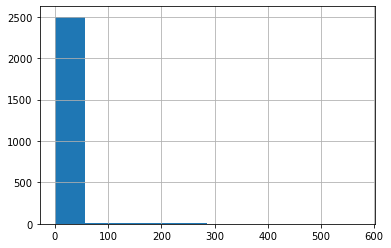

In [234]:
df_integrated['Real_Fuel/energy_economy'].hist()

In [235]:
df_hybrid=df_integrated.loc[df_integrated['Powertrain'] == 'hybrid'].copy()
df_conventional=df_integrated.loc[df_integrated['Powertrain'] == 'conventional'].copy()
df_hybrid=df_hybrid.dropna()
df_conventional=df_conventional.dropna()


In [236]:
df_hybrid

Vehicle        Date     Energy Powertrain    Distance  VehicleModel  \
1197     1801  2022-04-01  21.101092     hybrid  152.778852  New Flyer 40   
1198     1801  2022-04-02  24.155988     hybrid  168.948906  New Flyer 40   
1200     1801  2022-04-07   1.643673     hybrid   10.000853  New Flyer 40   
1201     1801  2022-04-08  38.867159     hybrid  156.441346  New Flyer 40   
1202     1801  2022-04-09  25.805408     hybrid  138.727266  New Flyer 40   
...       ...         ...        ...        ...         ...           ...   
2985     7901  2022-04-26  32.437797     hybrid  141.151438  New Flyer 60   
2986     7901  2022-04-27  15.594102     hybrid   70.485221  New Flyer 60   
2987     7901  2022-04-28  33.559792     hybrid   70.956078  New Flyer 60   
2988     7901  2022-04-29  35.276660     hybrid   88.344636  New Flyer 60   
2989     7901  2022-04-30  34.633007     hybrid   87.867102  New Flyer 60   

      Real_Energy  Fuel/energy_economy  Real_Fuel/energy_economy  
1197        50.91             7.240329                  3.000960  
1198        60.73             6.994080                  2.781968  
1200         5.89             6.084455                  1.697938  
1201        33.53             4.025027                  4.665713  
1202        23.54             5.375899                  5.893257  
...           ...                  ...                       ...  
2985        20.00             4.351450                  7.057572  
2986        40.10             4.519992                  1.757736  
2987        23.00             2.114318                  3.085047  
2988        20.00             2.504337                  4.417232  
2989        24.20             2.537091                  3.630872  

[111 rows x 9 columns]

In [237]:
#df_conventional=df_conventional[(df_conventional['Real_Fuel/energy_economy'] < 20)]

In [238]:
#df_conventional=df_conventional[(df_conventional['Real_Fuel/energy_economy'] > 1)]

In [239]:
train_conventional, test_conventional = train_test_split(df_conventional, test_size=0.2, random_state=(42))    
train_hybrid, test_hybrid = train_test_split(df_hybrid, test_size=0.2, random_state=(42))  

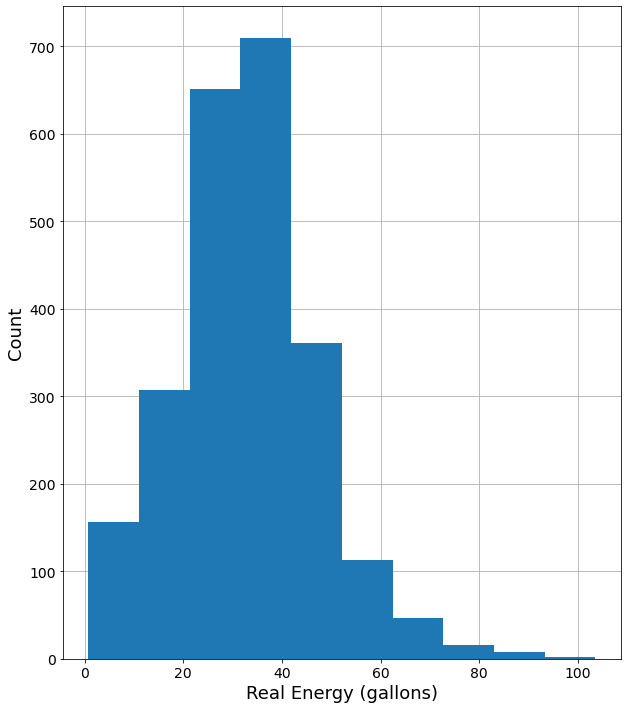

In [240]:
fig, ax = plt.subplots()
#df_conventional['Real_Fuel/energy_economy'][df_conventional['Real_Fuel/energy_economy']<20].hist(figsize = (10,12), zorder=3)
df_conventional['Real_Energy'].hist(figsize = (10,12), zorder=3)
plt.xlabel("Real Energy (gallons)", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig(r'../../figures/hist-energy-CDB.png', dpi=400, bbox_inches='tight')

<AxesSubplot:>

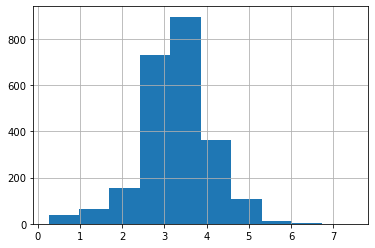

In [241]:
df_conventional['Fuel/energy_economy'].hist()

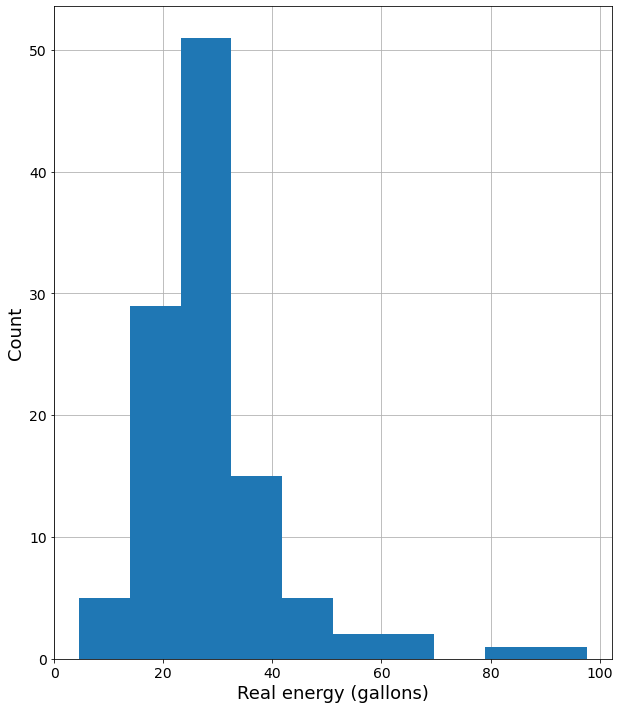

In [242]:
fig, ax = plt.subplots()
df_hybrid['Real_Energy'].hist(figsize = (10,12), zorder=3)
plt.xlabel("Real energy (gallons)", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig(r'../../figures/hist-energy-HEB.png', dpi=400, bbox_inches='tight')

<AxesSubplot:>

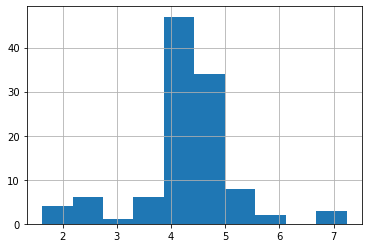

In [243]:
df_hybrid['Fuel/energy_economy'].hist()

In [244]:
df_conventional['Fuel/energy_economy'].mean()

3.2657362156997736

In [245]:
df_conventional['Real_Fuel/energy_economy'].mean()

3.253903059579212

In [246]:
df_hybrid['Fuel/energy_economy'].mean()

4.328153180395531

In [247]:
df_hybrid['Real_Fuel/energy_economy'].mean()

4.166555283149985

In [248]:
#df_conventional=df_conventional[(df_conventional['Real_Fuel/energy_economy'] < 20)]

In [249]:
#df_conventional['Real_Fuel/energy_economy'].hist()

In [250]:
#df_integrated.to_csv(r'../../results/model_plus_validation_results.csv')

In [251]:
from sklearn.metrics import mean_squared_error

rmse_conventional = mean_squared_error(df_conventional['Real_Fuel/energy_economy'], df_conventional['Fuel/energy_economy'], squared=False)
rmse_hybrid = mean_squared_error(df_hybrid['Real_Fuel/energy_economy'], df_hybrid['Fuel/energy_economy'], squared=False)
rmse_conventional_test = mean_squared_error(test_conventional['Real_Fuel/energy_economy'], test_conventional['Fuel/energy_economy'], squared=False)
rmse_hybrid_test = mean_squared_error(test_hybrid['Real_Fuel/energy_economy'], test_hybrid['Fuel/energy_economy'], squared=False)
rmse_conventional_train = mean_squared_error(train_conventional['Real_Fuel/energy_economy'], train_conventional['Fuel/energy_economy'], squared=False)
rmse_hybrid_train = mean_squared_error(train_hybrid['Real_Fuel/energy_economy'], train_hybrid['Fuel/energy_economy'], squared=False)

In [252]:
#print("For conventional RMSE total:", rmse_conventional, "test:", rmse_conventional_test, "train": rmse_conventional_train)

In [253]:
rmse_conventional

3.095884884778899

In [254]:
rmse_conventional_test

1.6748130459558128

In [255]:
rmse_conventional_train

3.3590110193395426

In [256]:
rmse_hybrid

1.706065984095521

In [257]:
rmse_hybrid_test

1.6286026678494152

In [258]:
rmse_hybrid_train 

1.7257390176781857

In [259]:
from sklearn.metrics import mean_squared_error

rmse_conventional = mean_squared_error(df_conventional['Real_Energy'], df_conventional['Energy'], squared=False)
rmse_hybrid = mean_squared_error(df_hybrid['Real_Energy'], df_hybrid['Energy'], squared=False)
rmse_conventional_test = mean_squared_error(test_conventional['Real_Energy'], test_conventional['Energy'], squared=False)
rmse_hybrid_test = mean_squared_error(test_hybrid['Real_Energy'], test_hybrid['Energy'], squared=False)
rmse_conventional_train = mean_squared_error(train_conventional['Real_Energy'], train_conventional['Energy'], squared=False)
rmse_hybrid_train = mean_squared_error(train_hybrid['Real_Energy'], train_hybrid['Energy'], squared=False)

In [260]:
rmse_conventional

13.934971608711011

In [261]:
rmse_conventional_test

15.346495468303571

In [262]:
rmse_conventional_train

13.55834658323221

In [263]:
rmse_hybrid

14.147396095669238

In [264]:
rmse_hybrid_test

9.381222880293842

In [265]:
rmse_hybrid_train 

15.147888288604948

In [266]:
#mse_hybrid = np.square(np.subtract(df_hybrid['Real_Fuel/energy_economy'],df_hybrid['Fuel/energy_economy'])).mean() 
#rmse_hybrid = math.sqrt(mse_hybrid)

C:\Users\Mahsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


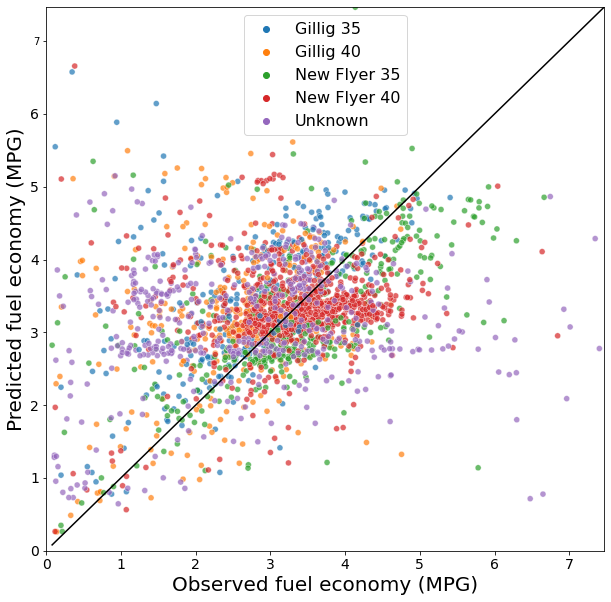

In [267]:
fig, ax = plt.subplots(figsize=(10,10))
#plt.scatter(df_conventional['Real_Fuel/energy_economy'], df_conventional['Fuel/energy_economy'], c=df_conventional['VehicleModel'].map(colors))
sns.scatterplot('Real_Fuel/energy_economy', 'Fuel/energy_economy', data=df_conventional, hue='VehicleModel', alpha=0.7)

p1 = max(max(df_conventional['Fuel/energy_economy']), max(df_conventional['Real_Fuel/energy_economy']))
p2 = min(min(df_conventional['Fuel/energy_economy']), min(df_conventional['Real_Fuel/energy_economy']))
plt.plot([p1, p2], [p1, p2], 'k-')
plt.xlabel('Observed fuel economy (MPG)', fontsize=20)
plt.ylabel('Predicted fuel economy (MPG)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.xlim([0, max(max(df_conventional['Fuel/energy_economy']), max(df_conventional['Fuel/energy_economy']))])
plt.ylim([0, max(max(df_conventional['Fuel/energy_economy']), max(df_conventional['Fuel/energy_economy']))])
fig.savefig(r'../../figures/actual-predicted-CDB.png', dpi=400, bbox_inches='tight')
plt.show()

C:\Users\Mahsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


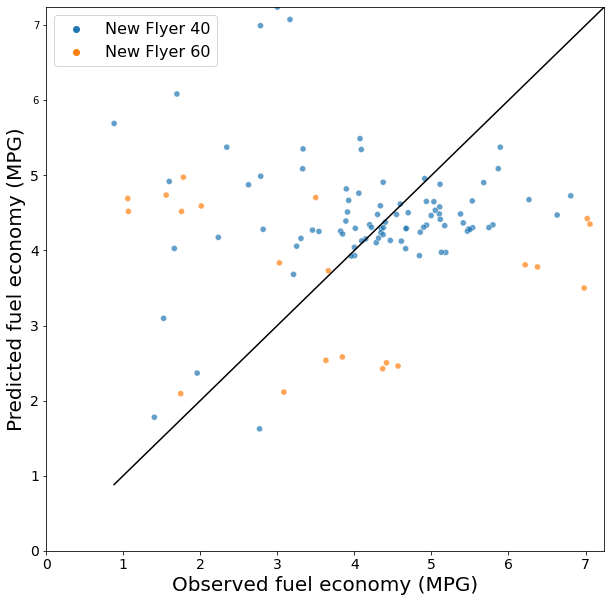

In [268]:
fig, ax = plt.subplots(figsize=(10,10))
#plt.scatter(df_hybrid['Real_Fuel/energy_economy'], df_hybrid['Fuel/energy_economy'], c='crimson')
sns.scatterplot('Real_Fuel/energy_economy', 'Fuel/energy_economy', data=df_hybrid, hue='VehicleModel', alpha=0.7)

p1 = max(max(df_hybrid['Fuel/energy_economy']), max(df_hybrid['Real_Fuel/energy_economy']))
p2 = min(min(df_hybrid['Fuel/energy_economy']), min(df_hybrid['Real_Fuel/energy_economy']))
plt.plot([p1, p2], [p1, p2], 'k-')
plt.xlabel('Observed fuel economy (MPG)', fontsize=20)
plt.ylabel('Predicted fuel economy (MPG)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.xlim([0, max(max(df_hybrid['Fuel/energy_economy']), max(df_hybrid['Fuel/energy_economy']))])
plt.ylim([0, max(max(df_hybrid['Fuel/energy_economy']), max(df_hybrid['Fuel/energy_economy']))])
fig.savefig(r'../../figures/actual-predicted-HEB.png', dpi=400, bbox_inches='tight')
plt.show()

C:\Users\Mahsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


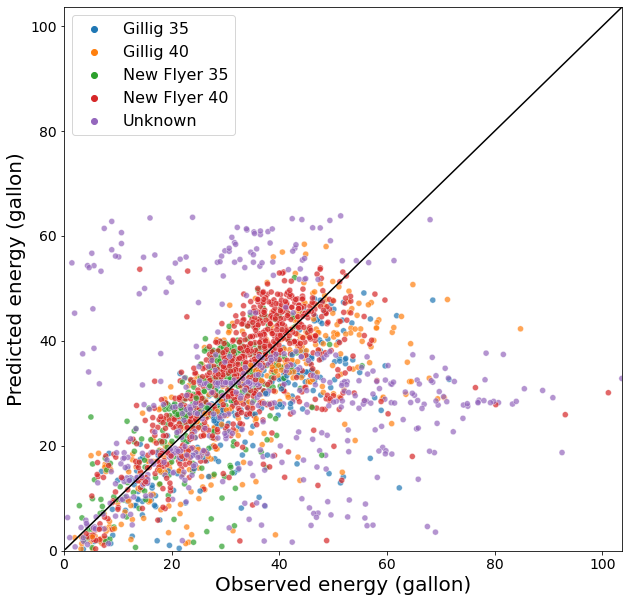

In [269]:
fig, ax = plt.subplots(figsize=(10,10))
#plt.scatter(df_conventional['Real_Energy'], df_conventional['Energy'], c='crimson')
sns.scatterplot('Real_Energy', 'Energy', data=df_conventional, hue='VehicleModel', alpha=0.7)

p1 = max(max(df_conventional['Real_Energy']), max(df_conventional['Energy']))
p2 = min(min(df_conventional['Real_Energy']), min(df_conventional['Energy']))
plt.plot([p1, p2], [p1, p2], 'k-')
plt.xlabel('Observed energy (gallon)', fontsize=20)
plt.ylabel('Predicted energy (gallon)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.xlim([0, max(max(df_conventional['Real_Energy']), max(df_conventional['Energy']))])
plt.ylim([0, max(max(df_conventional['Real_Energy']), max(df_conventional['Energy']))])
fig.savefig(r'../../figures/actual-predicted-CDB-energy.png', dpi=400, bbox_inches='tight')
plt.show()

C:\Users\Mahsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


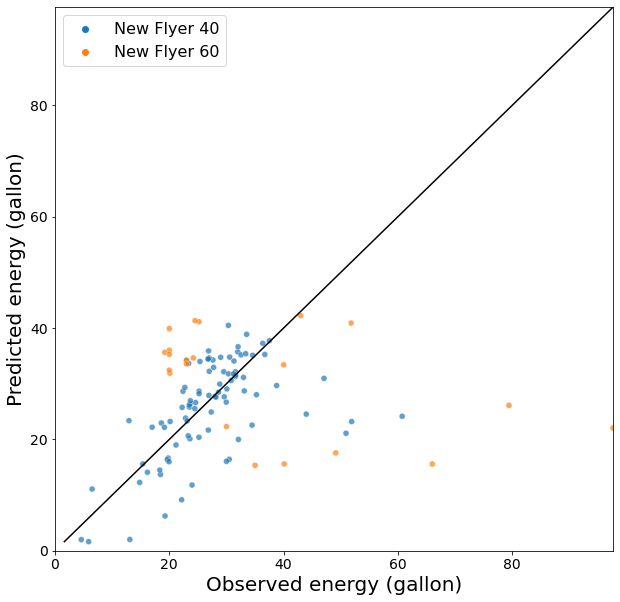

In [271]:
fig, ax = plt.subplots(figsize=(10,10))
#plt.scatter(df_hybrid['Real_Energy'], df_hybrid['Energy'], c='crimson')
sns.scatterplot('Real_Energy', 'Energy', data=df_hybrid, hue='VehicleModel', alpha=0.7)


p1 = max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))
p2 = min(min(df_hybrid['Real_Energy']), min(df_hybrid['Energy']))
plt.plot([p1, p2], [p1, p2], 'k-')
plt.xlabel('Observed energy (gallon)', fontsize=20)
plt.ylabel('Predicted energy (gallon)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.xlim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
plt.ylim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
fig.savefig(r'../../figures/actual-predicted-HEB-energy.png', dpi=400, bbox_inches='tight')
plt.show()

In [302]:
df_diesel=df_integrated[df_integrated['Powertrain']!='electric']

In [303]:
df_diesel = df_diesel.groupby(['Date','Vehicle']).agg({'Real_Energy':'sum', 'VehicleModel':'max'})[['Real_Energy','VehicleModel']].reset_index()

In [304]:
df_diesel['Date']= pd.to_datetime(df_diesel['Date'])

In [306]:
df_diesel=df_diesel.set_index('Date')

In [307]:
models=df_diesel['VehicleModel'].unique()

In [315]:
vehicles=df_diesel['Vehicle'].unique()

In [317]:
df_diesel

Vehicle  Real_Energy  VehicleModel
Date                                          
2022-04-01     1552        27.43     Gillig 35
2022-04-01     1553        39.79     Gillig 35
2022-04-01     1555        13.54     Gillig 35
2022-04-01     1557        55.71     Gillig 35
2022-04-01     1563        35.11     Gillig 35
...             ...          ...           ...
2022-04-30     7813        13.40       Unknown
2022-04-30     7814         3.60       Unknown
2022-04-30     7816        19.90  New Flyer 40
2022-04-30     7901        24.20  New Flyer 60
2022-04-30     7902        26.10       Unknown

[2890 rows x 3 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


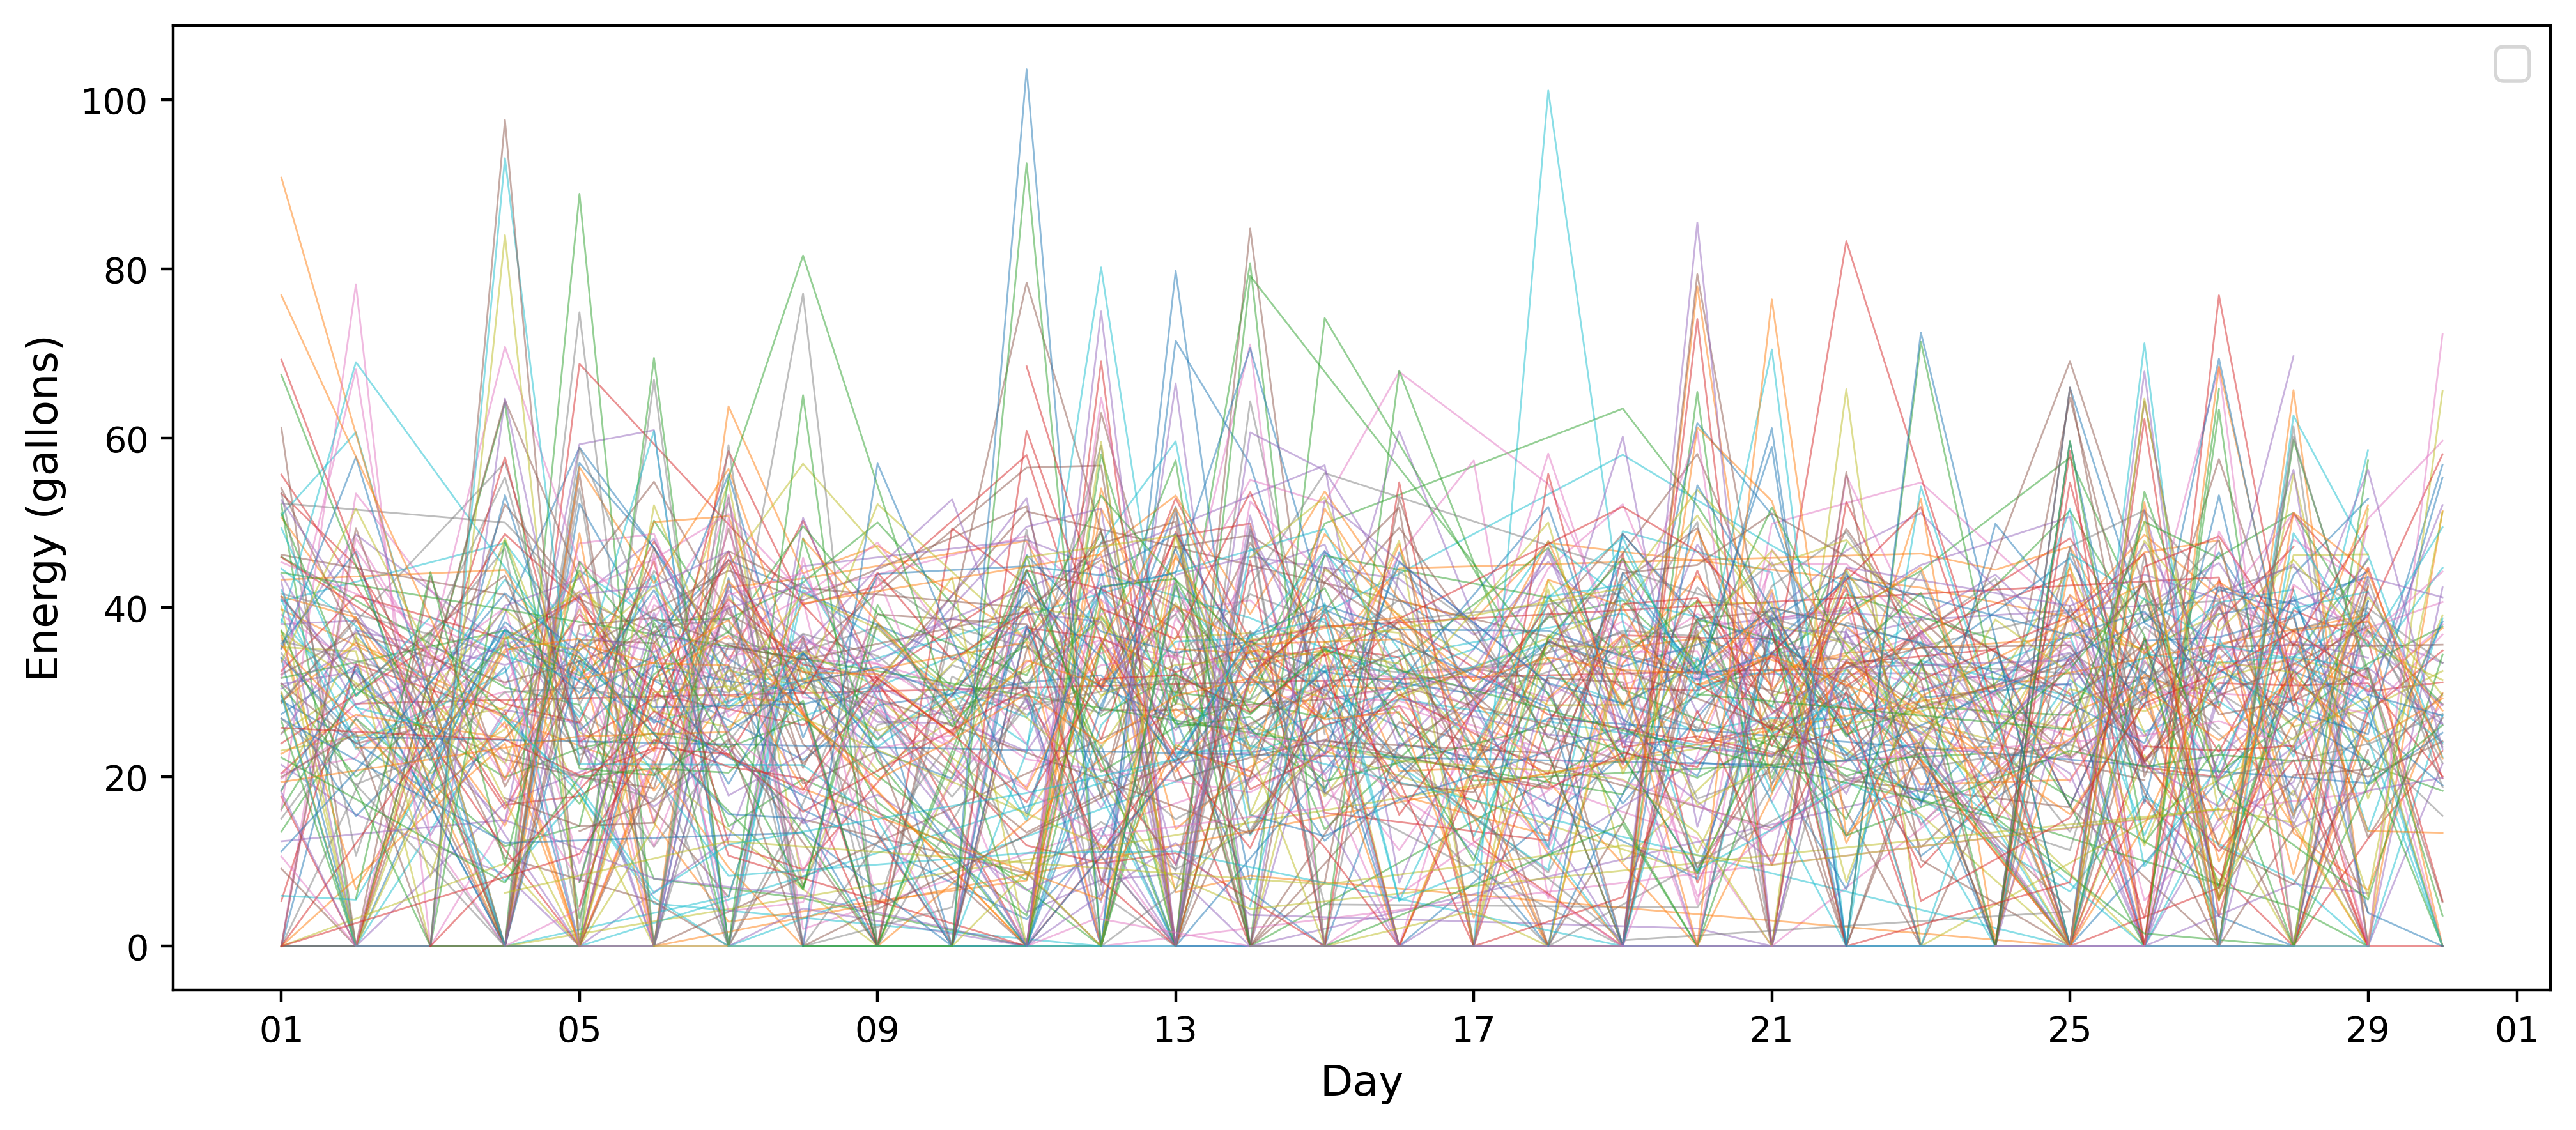

In [319]:
# set size
fig, ax = plt.subplots(figsize=(12, 5), dpi=400)

#figure(figsize=(11, 3), dpi=600)

# Plot
for v in vehicles:
    plot_df=df_diesel[df_diesel['Vehicle']==v]
    plt.plot(plot_df["Real_Energy"], marker='', linewidth=0.5, alpha=0.5, label=df_diesel['VehicleModel'])


date_form = DateFormatter('%d')
ax.xaxis.set_major_formatter(date_form)

# Labelling 
plt.ylabel("Energy (gallons)", fontsize=12)
plt.xlabel("Day", fontsize=12)

plt.legend(fontsize=12)
#red_patch = mpatches.Patch(color='red', label='Colored based on bus ID')
#plt.legend(handles=[red_patch])
#plt.grid()

# Saving
#plt.savefig(r'../../figures/fuel-consumption.png', dpi=200, bbox_inches='tight')

# Display
plt.show()

In [366]:
df_conventional['Real_Fuel/energy_economy'].mean()

3.253903059579212

In [367]:
df_conventional['Fuel/energy_economy'].mean()

3.4768101787935617

In [368]:
df1_vehicles=[3212]

In [370]:
df_integrated.loc[df_integrated['Vehicle'].isin(df1_vehicles)]

Vehicle        Date     Energy    Powertrain    Distance  Real_Energy  \
2083     3212  2022-04-07  54.448165  conventional  135.018871         29.3   
2084     3212  2022-04-08  29.268055  conventional   76.937812         77.1   
2086     3212  2022-04-11  30.128772  conventional   91.369757         29.5   
2087     3212  2022-04-12  14.322785  conventional   16.616347         10.6   
2089     3212  2022-04-14  36.638109  conventional  154.372203         42.6   
2090     3212  2022-04-15   5.323859  conventional   17.189445         55.9   
2091     3212  2022-04-23  21.680445  conventional   63.446732         33.1   
2092     3212  2022-04-24  22.640343  conventional   63.427457         21.3   
2094     3212  2022-04-26  18.438642  conventional   19.213700         46.2   
2096     3212  2022-04-28  28.856438  conventional  100.280686         60.2   
2097     3212  2022-04-29  51.213828  conventional  176.503042         31.7   

      Fuel/energy_economy  Real_Fuel/energy_economy  
2083             2.479769                  4.608153  
2084             2.628730                  0.997896  
2086             3.032641                  3.097280  
2087             1.160134                  1.567580  
2089             4.213433                  3.623761  
2090             3.228756                  0.307503  
2091             2.926450                  1.916820  
2092             2.801524                  2.977815  
2094             1.042034                  0.415881  
2096             3.475158                  1.665792  
2097             3.446394                  5.567919

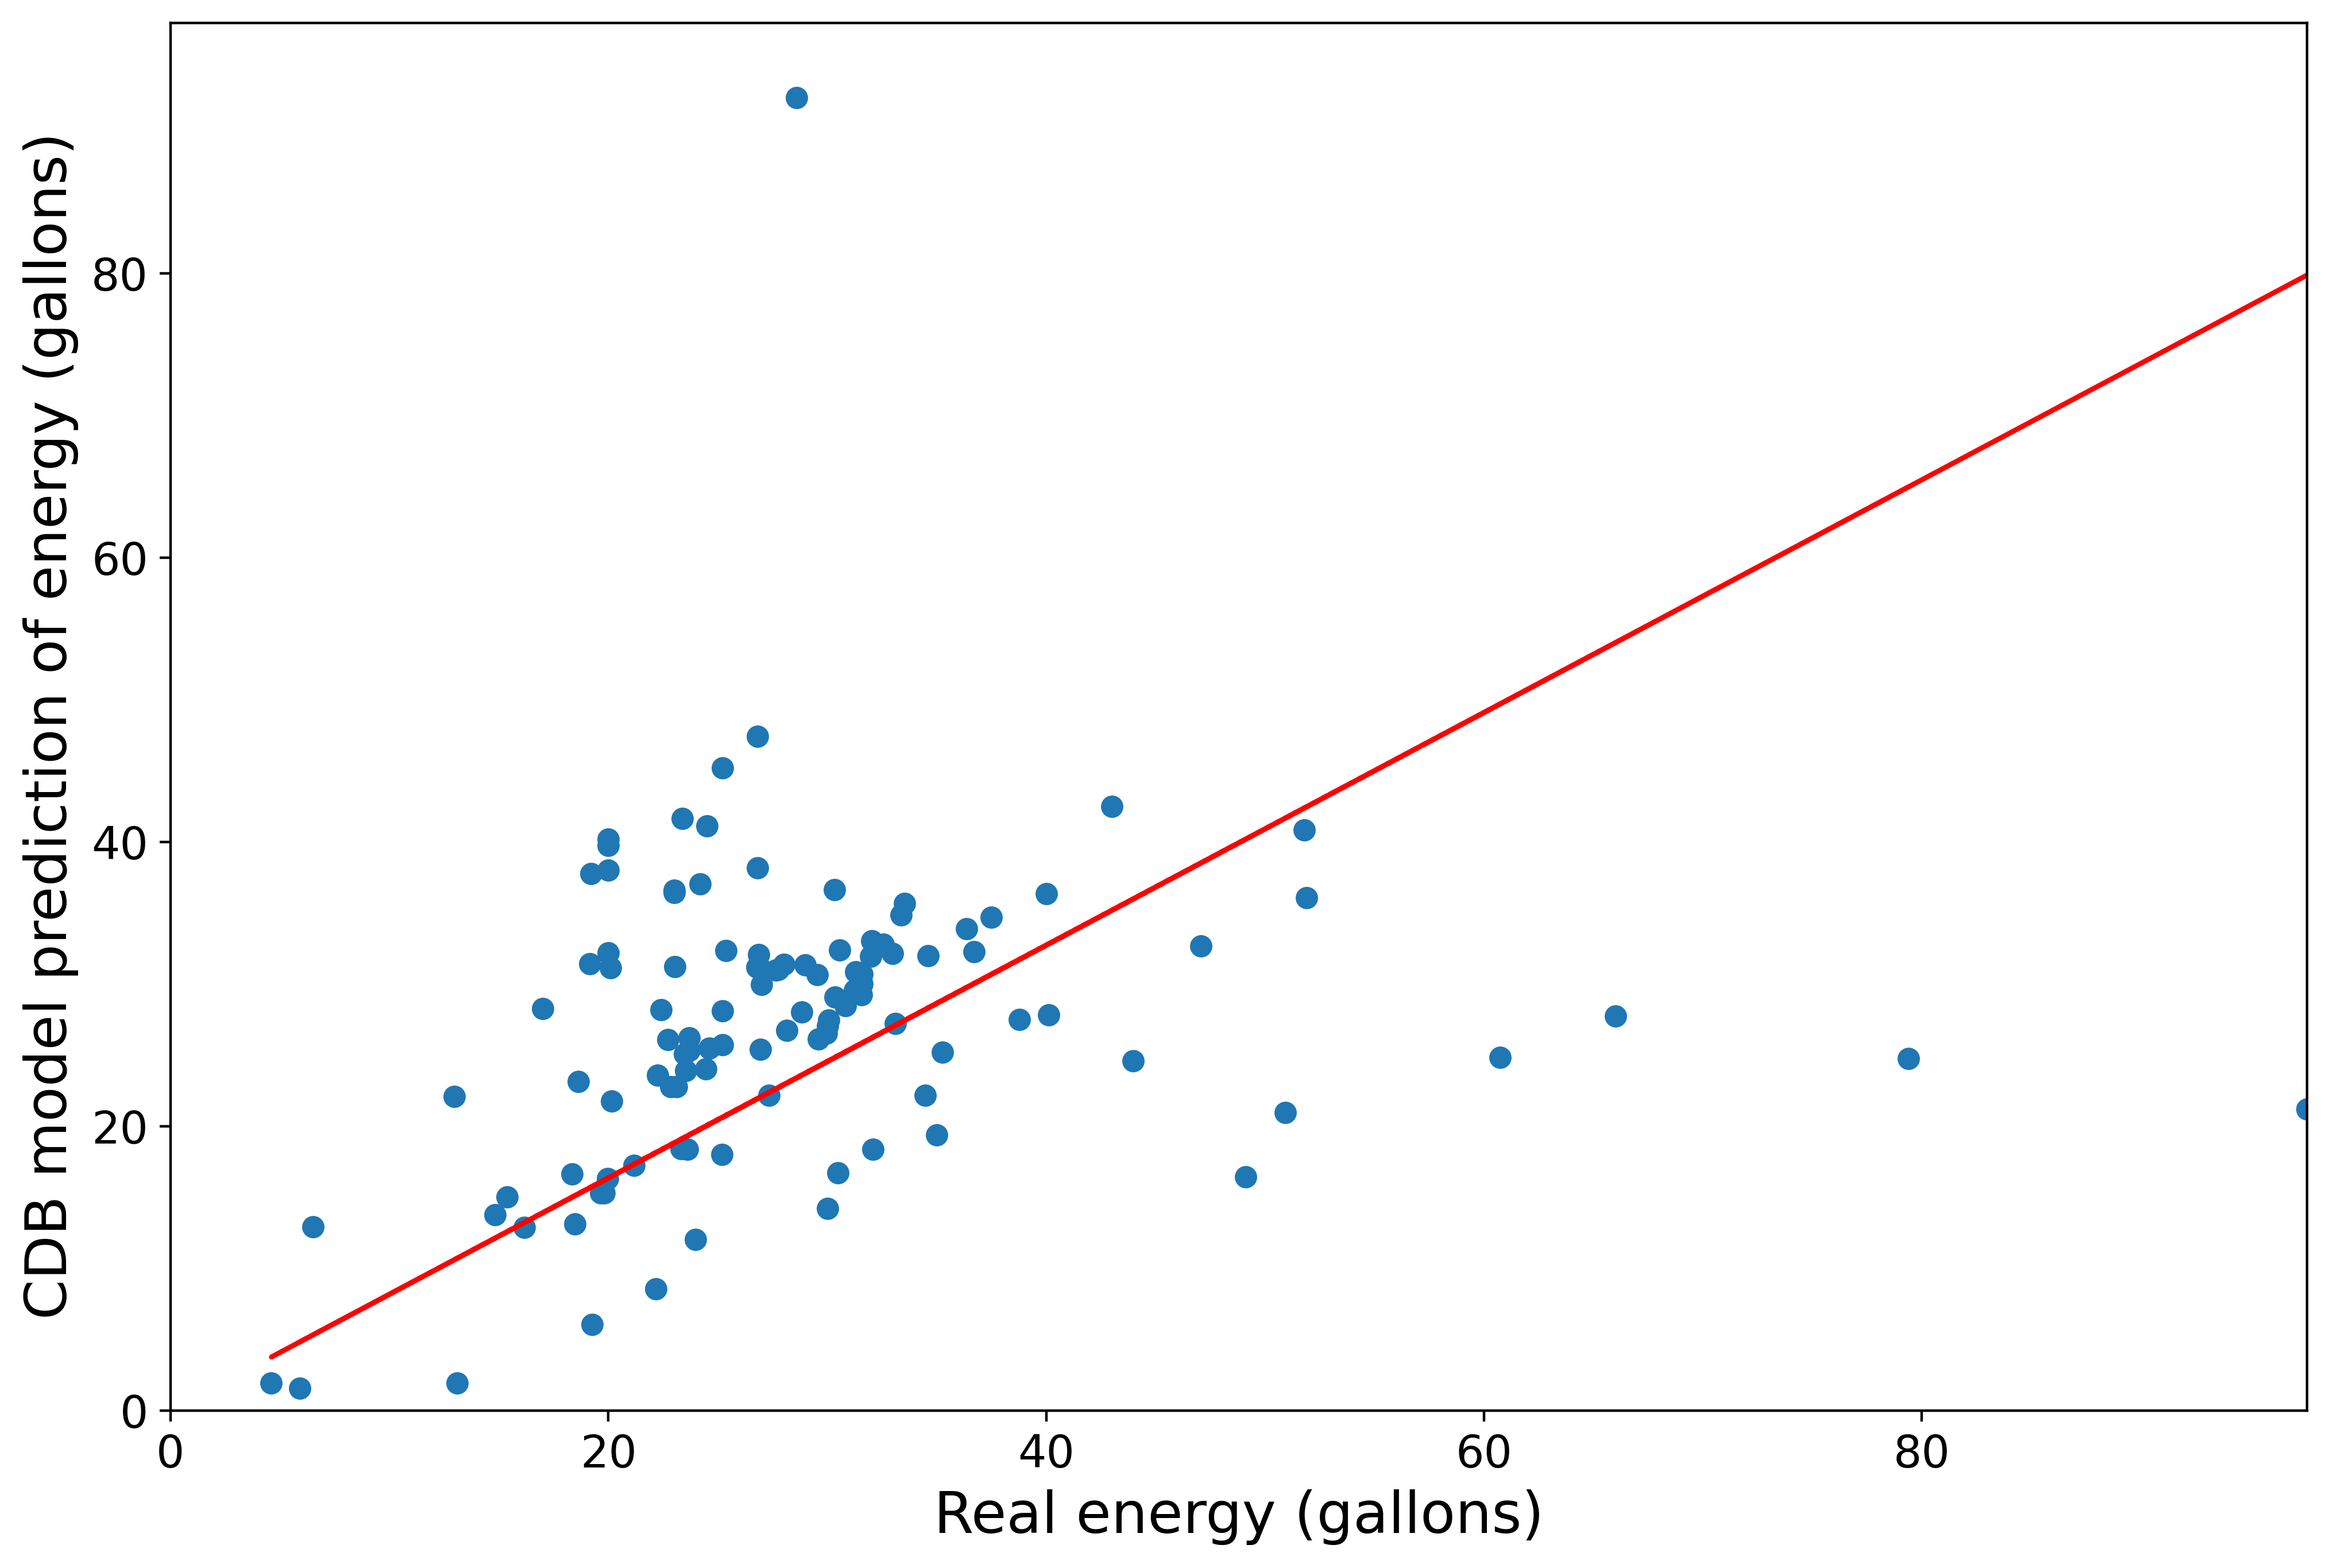

In [391]:
figure(figsize=(12, 8), dpi=400)
plt.plot(df_hybrid['Real_Energy'], 0.8183*df_hybrid['Real_Energy'], color='red')
plt.scatter(x=df_hybrid['Real_Energy'], y=df_hybrid['Energy'])
plt.xlabel("Real energy (gallons)", fontsize=18)
plt.ylabel("CDB model prediction of energy (gallons) ", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
plt.ylim([0, max(max(df_hybrid['Real_Energy']), max(df_hybrid['Energy']))])
plt.savefig(r'../../figures/beta-estimation.png', dpi=400, bbox_inches='tight')
plt.show()

In [376]:
X= df_hybrid['Real_Energy']
y= df_hybrid['Energy']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Energy   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                              372.9
Date:                Thu, 28 Jul 2022   Prob (F-statistic):                    3.96e-37
Time:                        08:22:53   Log-Likelihood:                         -450.90
No. Observations:                 111   AIC:                                      903.8
Df Residuals:                     110   BIC:                                      906.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [381]:
df_hybrid_filtered=df_hybrid[df_hybrid['Real_Energy']<=40]
df_hybrid_filtered=df_hybrid_filtered[df_hybrid['Energy']<=40]

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_39472\108788406.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_hybrid_filtered=df_hybrid_filtered[df_hybrid['Energy']<=40]


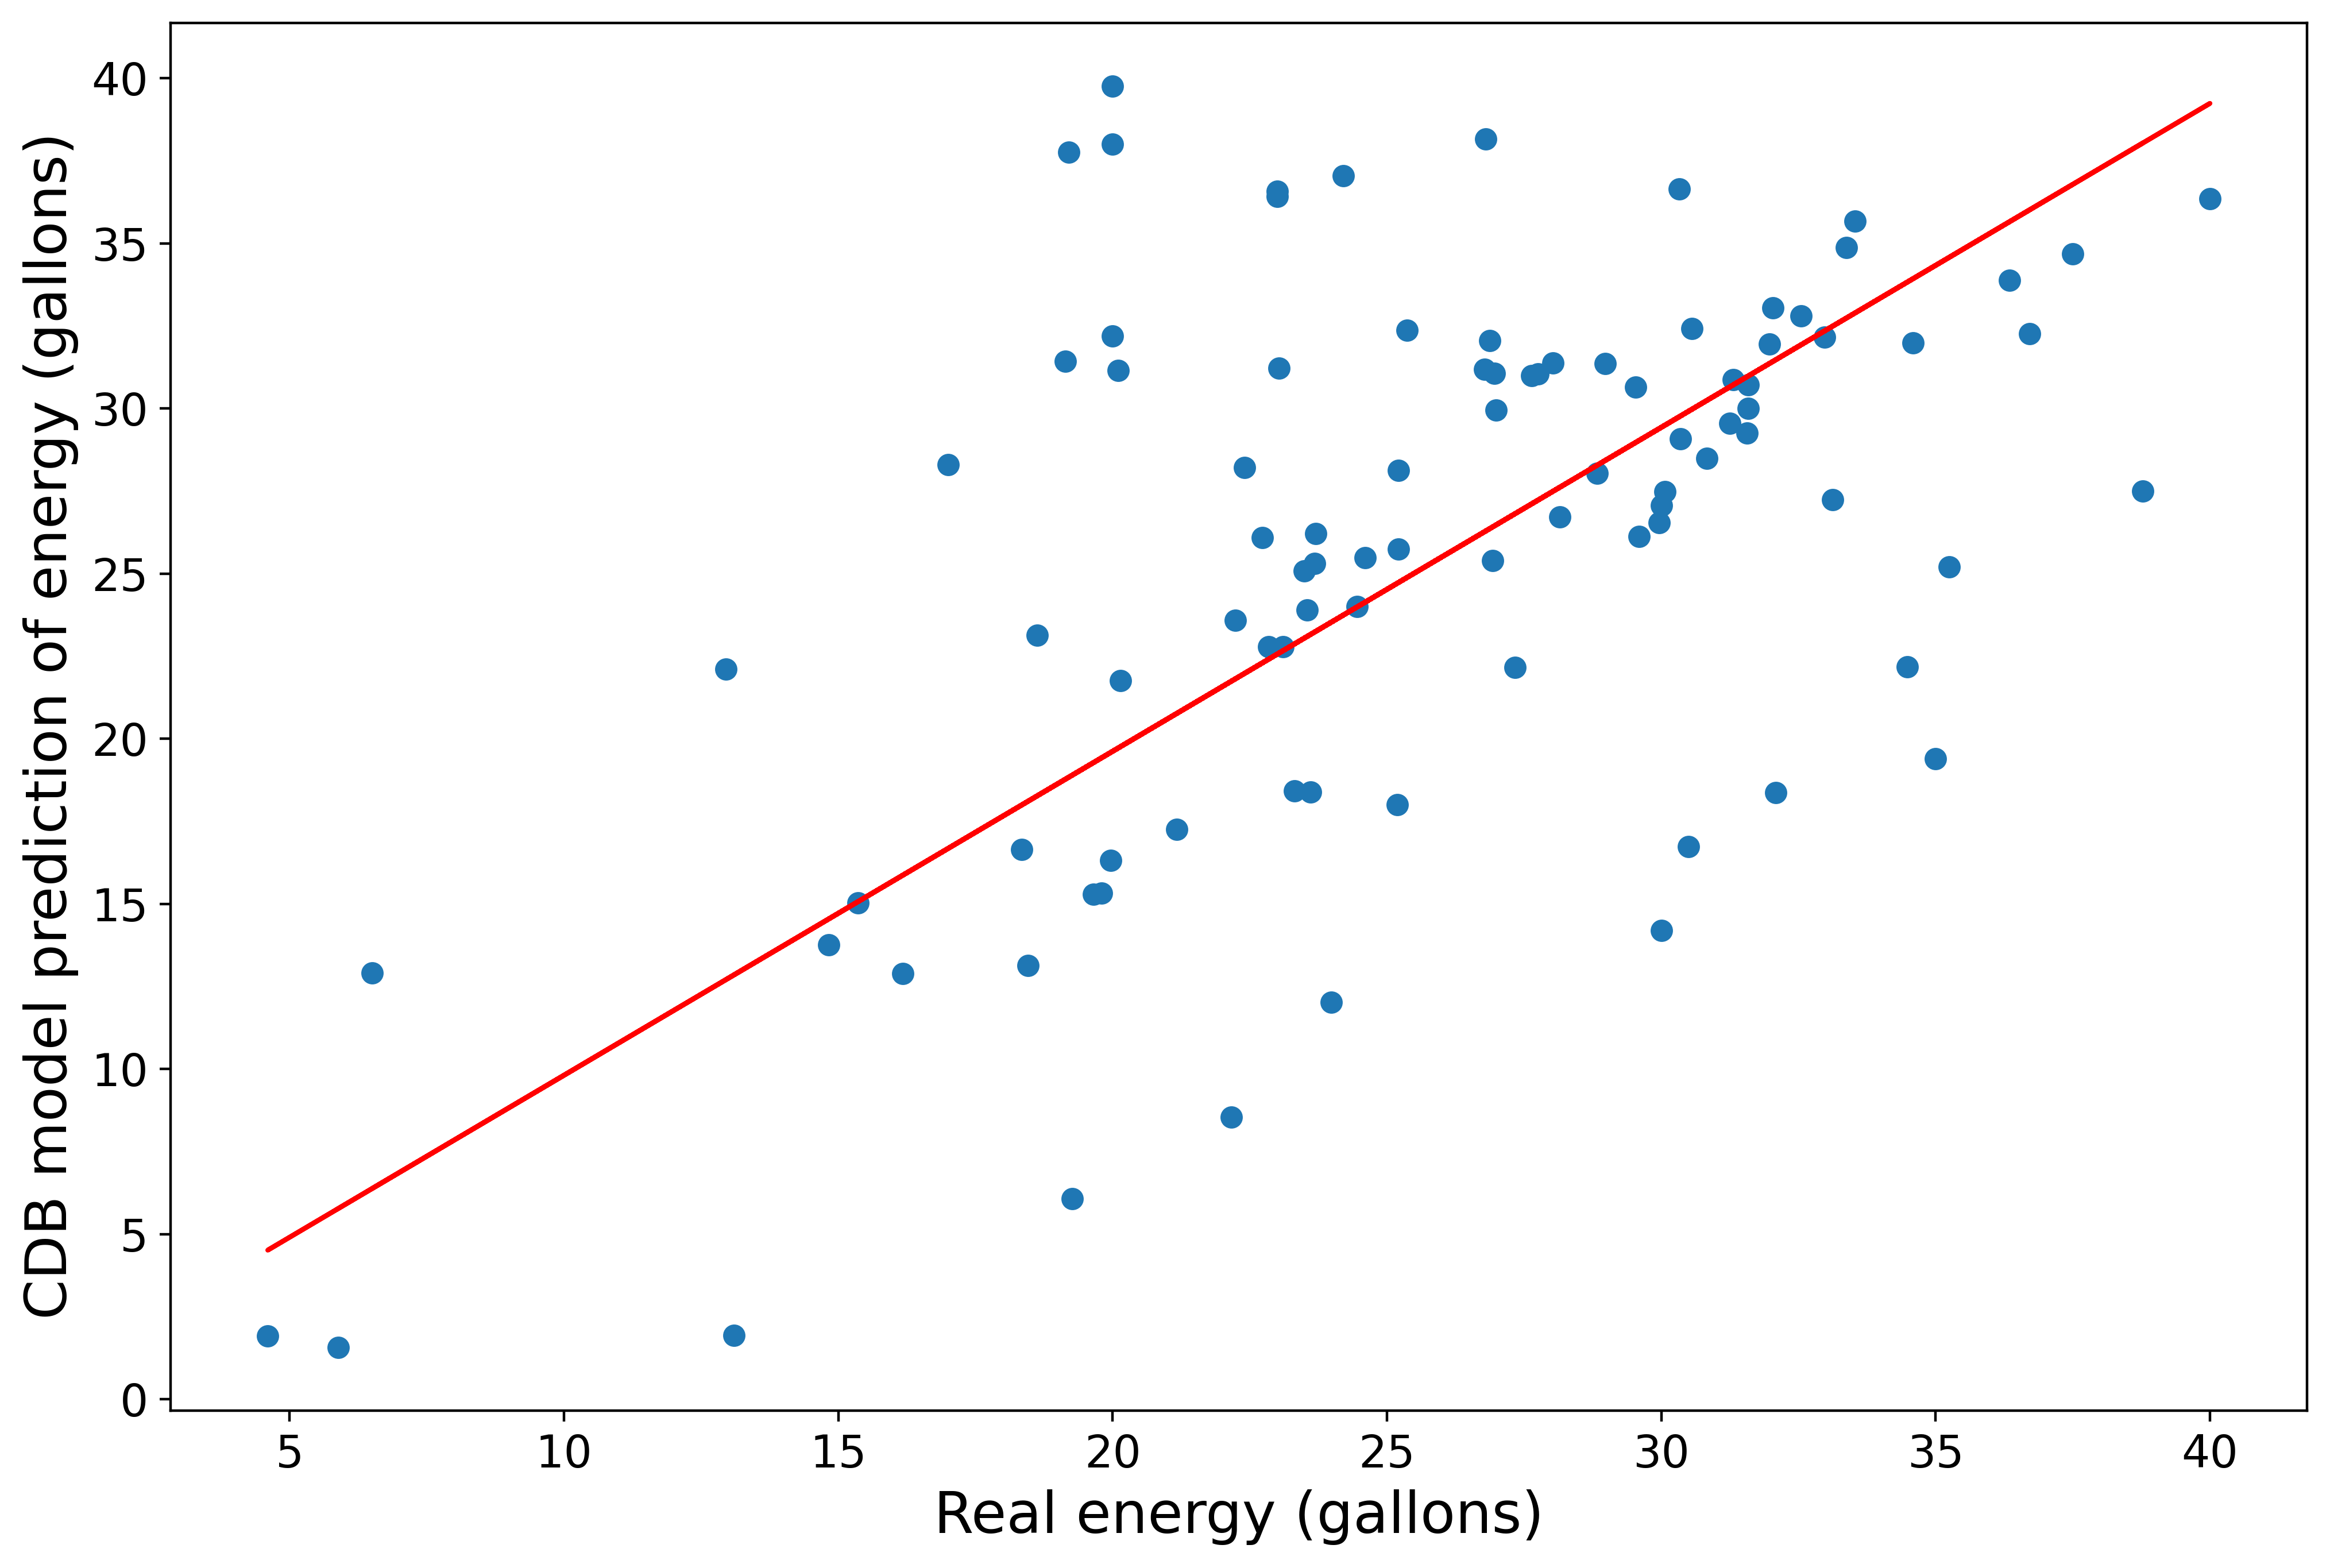

In [388]:
figure(figsize=(12, 8), dpi=400)
plt.plot(df_hybrid_filtered['Real_Energy'], 0.9810*df_hybrid_filtered['Real_Energy'], color='red')
plt.scatter(x=df_hybrid_filtered['Real_Energy'], y=df_hybrid_filtered['Energy'])
plt.xlabel("Real energy (gallons)", fontsize=18)
plt.ylabel("CDB model prediction of energy (gallons) ", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(r'../../figures/beta-estimation-without outliers.png', dpi=400, bbox_inches='tight')
plt.show()



In [383]:
X= df_hybrid_filtered['Real_Energy']
y= df_hybrid_filtered['Energy']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Energy   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              1152.
Date:                Thu, 28 Jul 2022   Prob (F-statistic):                    8.12e-54
Time:                        08:26:45   Log-Likelihood:                         -317.57
No. Observations:                  93   AIC:                                      637.1
Df Residuals:                      92   BIC:                                      639.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [149]:
df_integrated[df_integrated['Vehicle']==3501]

Vehicle        Date      Energy Powertrain    Distance  Real_Energy  \
2586     3501  2022-04-02   90.806561   electric   52.778767          1.2   
2588     3501  2022-04-04  205.677508   electric  108.093714          0.5   
2592     3501  2022-04-08  132.901194   electric   99.966964          1.1   
2595     3501  2022-04-29  127.896008   electric   93.890259          0.7   

      Fuel/energy_economy  Real_Fuel/energy_economy  
2586             0.581222                 43.982306  
2588             0.525550                216.187428  
2592             0.752190                 90.879059  
2595             0.734114                134.128942